In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train/255.0
x_test = x_test/255.0

print("x_train shape", x_train.shape)

4423680/4422102 [==============================] - 5s 1us/step
x_train shape (60000, 28, 28)


In [3]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print(x_train.shape)

(60000, 28, 28, 1)


In [6]:
K = len(set(y_train))
print(K)

10


In [7]:
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
x = Conv2D(128, (3,3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i,x)

In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 10s 169us/sample - loss: 0.5240 - accuracy: 0.8070 - val_loss: 0.4029 - val_accuracy: 0.8472
Epoch 2/15
60000/60000 [==============================] - 10s 158us/sample - loss: 0.3590 - accuracy: 0.8648 - val_loss: 0.3408 - val_accuracy: 0.8719
Epoch 3/15
60000/60000 [==============================] - 9s 145us/sample - loss: 0.3067 - accuracy: 0.8849 - val_loss: 0.3308 - val_accuracy: 0.8758
Epoch 4/15
60000/60000 [==============================] - 9s 151us/sample - loss: 0.2775 - accuracy: 0.8963 - val_loss: 0.2973 - val_accuracy: 0.8923
Epoch 5/15
60000/60000 [==============================] - 9s 145us/sample - loss: 0.2480 - accuracy: 0.9058 - val_loss: 0.2939 - val_accuracy: 0.8940
Epoch 6/15
60000/60000 [==============================] - 9s 146us/sample - loss: 0.2304 - accuracy: 0.9136 - val_loss: 0.2791 - val_accuracy: 0.9020
Epoch 7/15
60000/60000 [========================

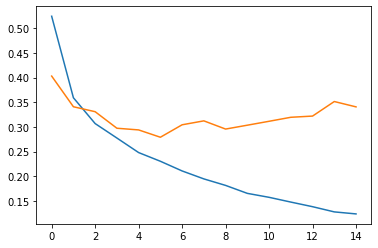

In [10]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.show()

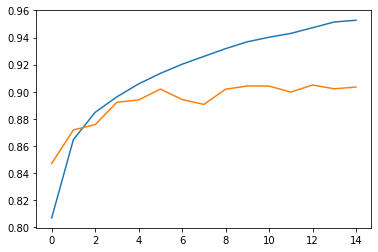

In [11]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.show()

In [12]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 13, 13, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 6, 6, 64)          18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               262656